In [1]:
import glob
import numpy as np
import os
import shutil
#from utils import log_progress
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

np.random.seed(42)

# 1 Data preprocessing

## (1) generate training, validation, and test sets
- randomly select subsets from original dataset

In [2]:
# Read all files from the fold 
_dataset_path = 'datasets/dog_cat/train/'
files = glob.glob(_dataset_path+"*")  #glob.glob is to extract the file into list

# save all cat images in cat_files

cat_files = []
dog_files = []

for f in files:
    fn = f.split('/')[-1].split('.')[0]
    if fn == 'cat':
        cat_files.append(f)
    elif fn == 'dog':
        dog_files.append(f)
    else:
        print("error:{}".format(f))

In [3]:
cat_files = np.array(cat_files)
dog_files = np.array(dog_files)

np.random.shuffle(cat_files)
np.random.shuffle(dog_files)

cat_train = cat_files[:1500]
cat_val = cat_files[1500:2000]
cat_test = cat_files[2000:2500]

dog_train = dog_files[:1500]
dog_val = dog_files[1500:2000]
dog_test = dog_files[2000:2500]
print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


## (2) copy selected subsets to folder


In [4]:
# Create directories
def create_folder(_fold_path):
    try:
        os.makedirs(_fold_path)
    except OSError:
        print("***folder already exist***")

In [6]:
_asset_path = 'asset/dog_cat/'

#named the directory of data set
train_dir = _asset_path+'training_data/'
val_dir = _asset_path+'validation_data/'
test_dir = _asset_path+'test_data/'

create_folder(train_dir)
create_folder(val_dir)
create_folder(test_dir)

In [7]:
# mix dog and cat
train_files = np.append(cat_train, dog_train)
validate_files = np.append(cat_val, dog_val)
test_files = np.append(cat_test, dog_test)

In [11]:
from shutil import copy2
def copy_to_dir(src_path, dst_path):
    for f in src_path:
        try:
            f_name = f.split("/")[-1]
            copy2(f,dst_path+f_name)
        except OSError:
            print("***{} already exist***".format(f))
    print("sucess")     
    return

In [13]:
# copy files to folder
copy_to_dir(train_files, train_dir)
copy_to_dir(validate_files, val_dir)
copy_to_dir(test_files, test_dir)

sucess
sucess
sucess


## (3) Build working dataset from selected files

In [14]:
# the input shape
IMG_DIM = (150, 150)

# To extract the samples from directory of train
train_files = glob.glob(train_dir+"*") 
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in train_files]

# To extract the samples from directory of val
validation_files = glob.glob(val_dir+'*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in validation_files]

test_files = glob.glob(test_dir+'*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in test_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


### (4) convert category labels to integer

In [16]:
from sklearn.preprocessing import LabelEncoder

# encode labels
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
test_labels_enc = le.transform(test_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['dog', 'dog', 'cat', 'cat', 'cat'] [1 1 0 0 0]


## (5) setup  ImageDataGenerator
for details, please refer to https://keras.io/preprocessing/image/#imagedatagenerator-class 

In [21]:
## introduce ImageDataGenerator in details

# To generate the sample from ImageDataGenerator on totation and horizontal_flip
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #zoom_range=0.3, 
                                   rotation_range=50,
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)

original image


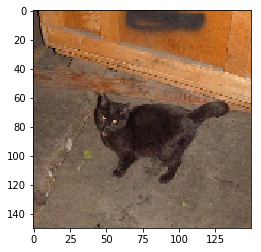

In [33]:
img_id = 9
plt.figure()
plt.imshow(train_imgs[img_id]/255.)

print("original image")

Generated images: 
Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


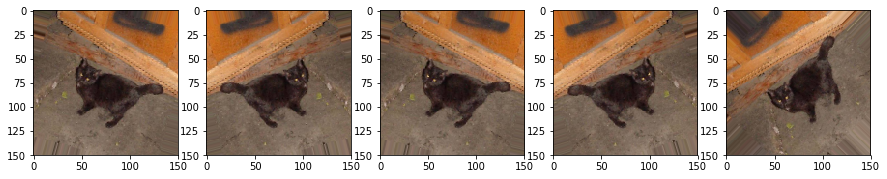

In [34]:
#To show the generated image which was desigened with ImageDataGenerator
#img_id = 9
temp_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
temp = [next(temp_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))


print("Generated images: ")
print('Labels:', [item[1][0] for item in temp])
l = [ax[i].imshow(temp[i][0][0]) for i in range(0,5)]

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen  = ImageDataGenerator(rescale=1./255)

In [18]:
# To generate the sample from ImageDataGenerator
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

### zoom_range

In [6]:
## introduce ImageDataGenerator in details

# To generate the sample from ImageDataGenerator on zoom_range
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3, 
                                   #rotation_range=50,
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   #horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)


Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


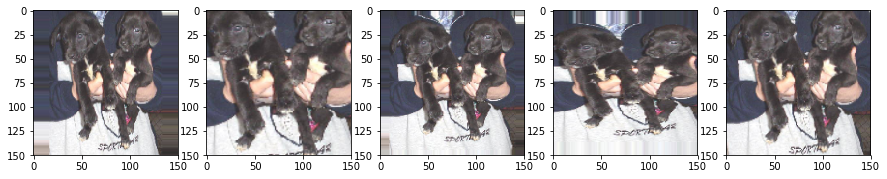

In [7]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

### rotation

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #zoom_range=0.3, 
                                   rotation_range=50,
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   #horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


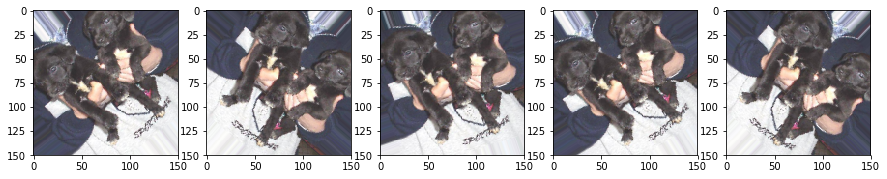

In [10]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

# Exercise 1 shift

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   ##########################
                                   ### insert code here  ###
                                   ##########################
                                   )

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


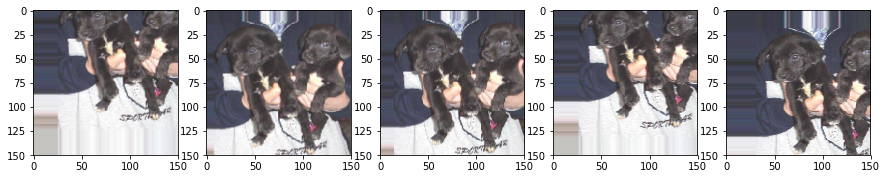

In [12]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

# Exercise 2: flip

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   ##########################
                                   ### insert code here  ###
                                   ##########################
                                   )

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


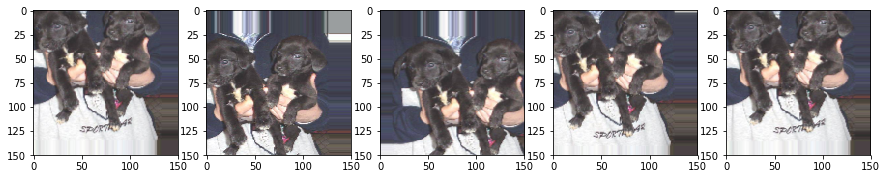

In [13]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

# 2 Data augmentation with Rotation

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=60)

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


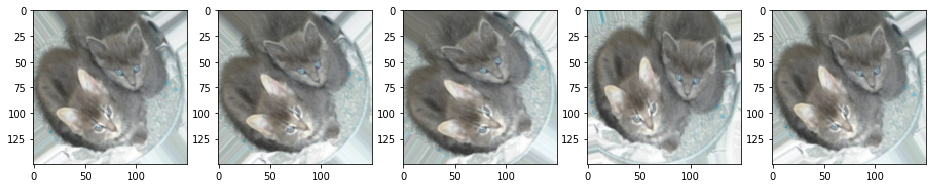

In [21]:
## get img_id: 2595
img_id = 2595
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=32)

# get the following 5 images
cat = [next(cat_generator) for i in range(0,5)]

fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [9]:
# To generate the sample from ImageDataGenerator
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
# regularization of dropout
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6934 - acc: 0.5200 - val_loss: 0.6863 - val_acc: 0.5610
Epoch 2/100
100/100 [==============================] - 10s 95ms/step - loss: 0.6836 - acc: 0.5630 - val_loss: 0.6564 - val_acc: 0.6215
Epoch 3/100
100/100 [==============================] - 9s 95ms/step - loss: 0.6569 - acc: 0.6070 - val_loss: 0.6240 - val_acc: 0.6500
Epoch 4/100
100/100 [==============================] - 10s 96ms/step - loss: 0.6413 - acc: 0.6273 - val_loss: 0.6226 - val_acc: 0.6377
Epoch 5/100
100/100 [==============================] - 10s 96ms/step - loss: 0.6235 - acc: 0.6533 - val_loss: 0.5865 - val_acc: 0.6820
Epoch 6/100
100/100 [==============================] - 10s 96ms/step - loss: 0.6079 - acc: 0.6663 - val_loss: 0.6273 - val_acc: 0.6306
Epoch 7/100
100/100 [==============================] - 10s 96ms/step - loss: 0.5976 - acc: 0.6850 - val_loss: 0.5649 - val_acc: 0.7140
Epoch 8/100
100/100 [==============================] - 

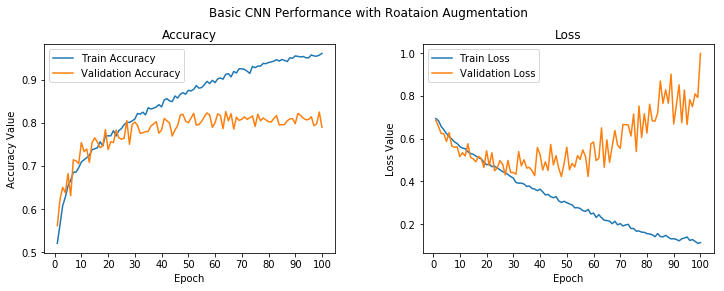

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with Roataion Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [13]:
model.save('cats_dogs_cnn_img_rotation.h5')

# Exercise 3 data agumentation with flip

In [14]:
# To expand the samples using ImageDataGenerator
                                   ##########################
                                   ### insert code here  ###
                                   ##########################

val_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [19]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 10s 100ms/step - loss: 0.5440 - acc: 0.7720 - val_loss: 0.5078 - val_acc: 0.7740
Epoch 2/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4805 - acc: 0.7803 - val_loss: 0.4172 - val_acc: 0.8229
Epoch 3/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4647 - acc: 0.7863 - val_loss: 0.4814 - val_acc: 0.7890
Epoch 4/100
100/100 [==============================] - 10s 98ms/step - loss: 0.4570 - acc: 0.7980 - val_loss: 0.4404 - val_acc: 0.8128
Epoch 5/100
100/100 [==============================] - 10s 98ms/step - loss: 0.4666 - acc: 0.7957 - val_loss: 0.5512 - val_acc: 0.8050
Epoch 6/100
100/100 [==============================] - 10s 98ms/step - loss: 0.4589 - acc: 0.7913 - val_loss: 0.4053 - val_acc: 0.8279
Epoch 7/100
100/100 [==============================] - 10s 101ms/step - loss: 0.4688 - acc: 0.7863 - val_loss: 0.4765 - val_acc: 0.8130
Epoch 8/100
100/100 [==============================] 

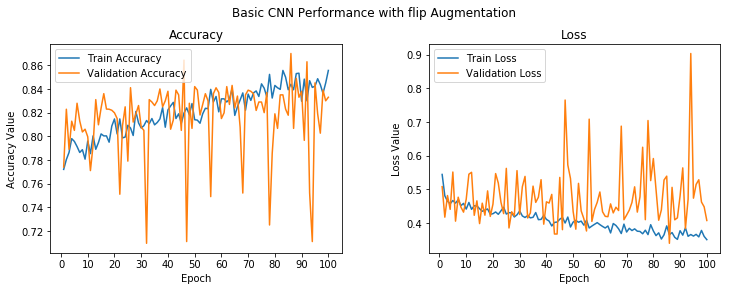

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with flip Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Exercise 4 data augmentation with shift

In [26]:
# To expand the samples using ImageDataGenerator
                                   ##########################
                                   ### insert code here  ###
                                   ##########################

val_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [28]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 10s 100ms/step - loss: 0.1795 - acc: 0.9273 - val_loss: 0.4374 - val_acc: 0.8860
Epoch 2/100
100/100 [==============================] - 10s 98ms/step - loss: 0.1927 - acc: 0.9257 - val_loss: 0.8828 - val_acc: 0.7935
Epoch 3/100
100/100 [==============================] - 10s 96ms/step - loss: 0.1821 - acc: 0.9280 - val_loss: 1.0259 - val_acc: 0.7270
Epoch 4/100
100/100 [==============================] - 10s 96ms/step - loss: 0.1948 - acc: 0.9233 - val_loss: 0.4323 - val_acc: 0.8553
Epoch 5/100
100/100 [==============================] - 10s 98ms/step - loss: 0.1720 - acc: 0.9350 - val_loss: 0.5278 - val_acc: 0.8520
Epoch 6/100
100/100 [==============================] - 10s 96ms/step - loss: 0.1817 - acc: 0.9310 - val_loss: 0.3770 - val_acc: 0.8623
Epoch 7/100
100/100 [==============================] - 10s 97ms/step - loss: 0.1649 - acc: 0.9340 - val_loss: 0.4679 - val_acc: 0.8690
Epoch 8/100
100/100 [==============================] -

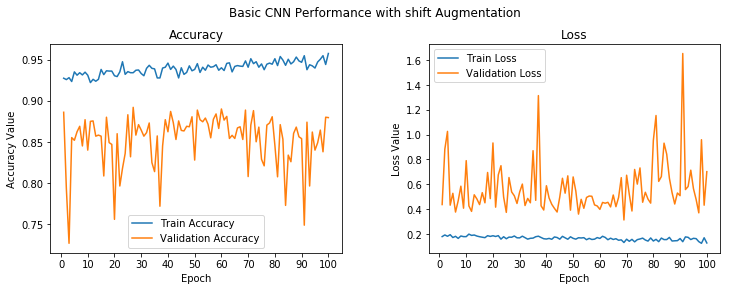

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with shift Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Exercise 5 data agumentation with all constraints

In [30]:
# To expand the samples using ImageDataGenerator
                                   ##########################
                                   ### insert code here  ###
                                   ##########################

val_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [32]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 10s 103ms/step - loss: 0.4131 - acc: 0.8377 - val_loss: 0.4146 - val_acc: 0.8450
Epoch 2/100
100/100 [==============================] - 10s 98ms/step - loss: 0.3529 - acc: 0.8517 - val_loss: 0.4769 - val_acc: 0.8441
Epoch 3/100
100/100 [==============================] - 10s 101ms/step - loss: 0.3470 - acc: 0.8540 - val_loss: 0.4290 - val_acc: 0.8550
Epoch 4/100
100/100 [==============================] - 10s 100ms/step - loss: 0.3335 - acc: 0.8550 - val_loss: 0.3726 - val_acc: 0.8573
Epoch 5/100
100/100 [==============================] - 10s 99ms/step - loss: 0.3707 - acc: 0.8427 - val_loss: 0.5739 - val_acc: 0.8160
Epoch 6/100
100/100 [==============================] - 10s 98ms/step - loss: 0.3423 - acc: 0.8627 - val_loss: 0.6469 - val_acc: 0.8057
Epoch 7/100
100/100 [==============================] - 10s 99ms/step - loss: 0.3581 - acc: 0.8523 - val_loss: 0.3698 - val_acc: 0.8640
Epoch 8/100
100/100 [==============================]

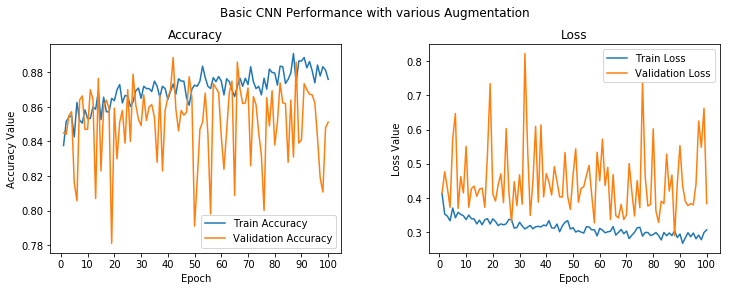

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with various Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")